# Downloading Data Using yfinance
<hr style="border: 2px solid blue">

In [5]:
import yfinance as yf
import pandas as pd
import numpy as np
import pandas_ta as ta
import plotly.graph_objects as go
import plotly.io
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

In [9]:
# Choose a stock and date range to download data, using AAPL as an example

# YTD data for AAPL
ticker = "AAPL"

data = yf.download(ticker, start="2024-01-01", end="2024-08-18")
data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553482,58414500
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222321,71983600
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495087,62303300
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500
...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600


In [ ]:
# Add Candlestick plot only to the first subplot (row 1, col 1)
fig.add_trace(go.Candlestick(x=data.index, open=data["Open"], close=data["Close"], 
                             high=data["High"], low=data["Low"], name="Daily Candle"), 
              row=1, col=1)

# Add RSI line plot only to the second subplot (row 2, col 1)
fig.add_trace(go.Scatter(x=data.index, y=data["rsi"], name="Relative Strength Index"), 
              row=2, col=1)

# Update the layout to your preferences
fig.update_layout(
    title=f"{ticker} Technical Analysis",
    yaxis_title="Price",
    xaxis_title="Date",
    height=800,
    template="seaborn"
)

fig.show()


In [58]:
data["lower_bb"]

Date
2024-01-02    BBL_20_2.0
2024-01-03    BBL_20_2.0
2024-01-04    BBL_20_2.0
2024-01-05    BBL_20_2.0
2024-01-08    BBL_20_2.0
                 ...    
2024-08-12    BBL_20_2.0
2024-08-13    BBL_20_2.0
2024-08-14    BBL_20_2.0
2024-08-15    BBL_20_2.0
2024-08-16    BBL_20_2.0
Name: lower_bb, Length: 158, dtype: object

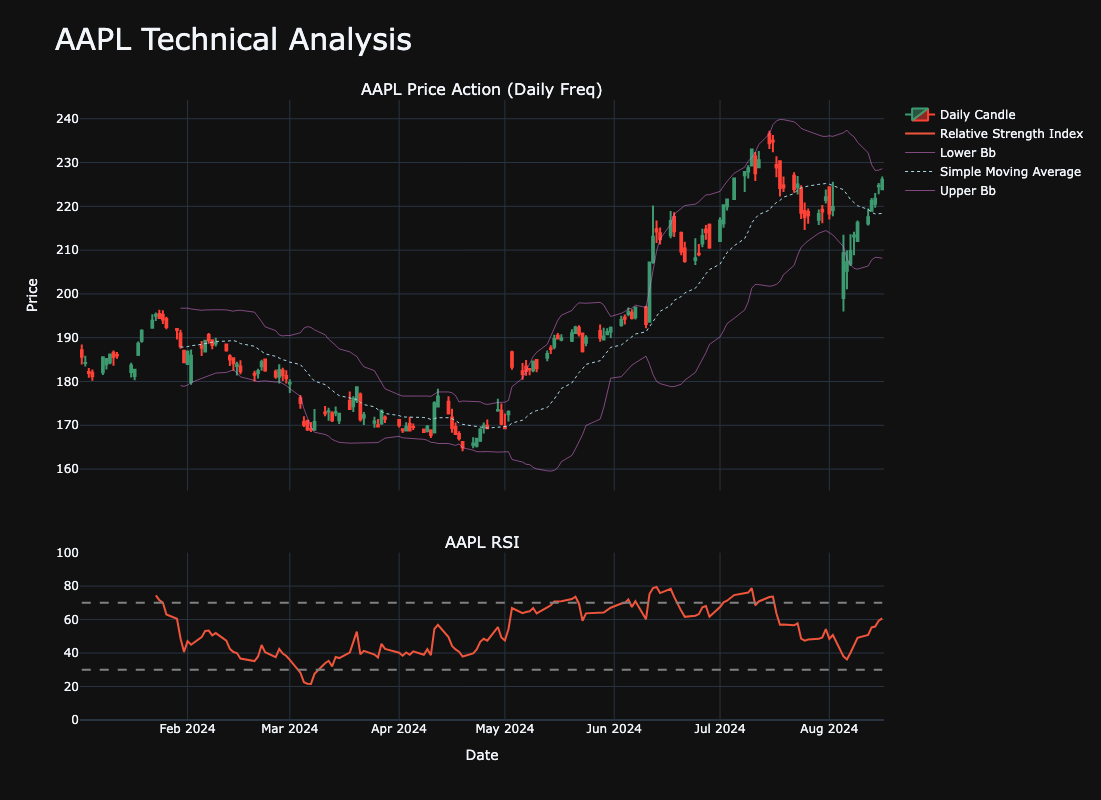

In [102]:
bollingers = ta.bbands(data["Close"], length=20).iloc[:, 0:3]
data["lower_bb"], data["simple_moving_average"], data["upper_bb"] = bollingers.iloc[:, 0], bollingers.iloc[:, 1], bollingers.iloc[:, 2]
data["rsi"] = ta.rsi(data["Close"], length=14)

fig = make_subplots(rows=2, cols=1, row_heights=[.7, .3], subplot_titles=[f"{ticker} Price Action (Daily Freq)", f"{ticker} RSI"], 
                    vertical_spacing=.1, shared_xaxes=True)
candles = go.Candlestick(x=data.index, open=data["Open"], close=data["Close"], high=data["High"], 
                             low=data["Low"], name="Daily Candle")

fig.add_trace(candles, row=1, col=1)

fig.add_trace(go.Scatter(x=data.index, y=data["rsi"], name="Relative Strength Index"), row=2, col=1)

colors = ["violet", "lightblue"]
styles = ["solid", "dot"]
widths = [.5, 1]
for idx, col in enumerate(["lower_bb", "simple_moving_average", "upper_bb"]):
    fig.add_trace(go.Scatter(x=data.index, y=data[col], name=col.replace("_", " ").title(),
                            line={"color":colors[idx%2], "width":widths[idx%2], "dash":styles[idx%2]}), row=1, col=1)

fig.update_layout(
    title = {"text":f"{ticker} Technical Analysis", "x":0.05, "font_size":30},
    yaxis_title = "Price",
    xaxis2 = {"title":"Date"},
    height=800,
    template="plotly_dark",
    xaxis_rangeslider_visible = False
)

limits = [30, 70]

for lim in limits:
    fig.add_trace(go.Scatter(x=data.index, y = np.array([lim for i in range(len(data.index))]), line={"color":"gray", "dash":"dash"},
                             name=f"{lim} RSI", showlegend=False), row=2, col=1)

fig.update_layout(yaxis2={"range":[0, 100]})
    

fig.show()

In [76]:
data

,Open,High,Low,Close,Adj Close,Volume,lower_bb,simple_moving_average,upper_bb,rsi
Date,,,,,,,,,,
2024-01-02,187.149994,188.440002,183.889999,185.639999,184.938217,82488700,NaN,NaN,NaN,NaN
2024-01-03,184.220001,185.880005,183.429993,184.250000,183.553482,58414500,NaN,NaN,NaN,NaN
2024-01-04,182.149994,183.089996,180.880005,181.910004,181.222321,71983600,NaN,NaN,NaN,NaN
2024-01-05,181.990005,182.759995,180.169998,181.179993,180.495087,62303300,NaN,NaN,NaN,NaN
2024-01-08,182.089996,185.600006,181.500000,185.559998,184.858521,59144500,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2024-08-12,216.070007,219.509995,215.600006,217.529999,217.529999,38028100,206.361120,219.294501,232.227883,50.770277
2024-08-13,219.009995,221.889999,219.009995,221.270004,221.270004,44155300,207.753826,218.617001,229.480177,55.306553
2024-08-14,220.570007,223.029999,219.699997,221.720001,221.720001,41960600,208.341552,218.259001,228.176450,55.833884
